In [4]:
import warnings
warnings.filterwarnings('ignore')
#忽略warnings（在导入数据时，有时会出现warnings，但不要因为这件事就立即删除）

In [5]:
import pandas as pd
#导入数据分析包【pandas】，并简称为pd

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#导入test set和train set

In [7]:
train_df.shape,test_df.shape
#展示test set和train set，（行数，列数）
#为什么训练集会比测试集多一列，y值的那一列，需要用x回归得出y值

((891, 12), (418, 11))

In [22]:
import matplotlib.pyplot as plt
#导入图形绘制包

In [11]:
print(train_df.columns.values)
#读取训练集的表头

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:
print(test_df.columns.values)
#读取测试集的表头

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [13]:
train_df.head()
#预览数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test_df.head()
#由此可见，该数据集的划分是直接以编号划分的

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train_df.info()
#训练集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
test_df.info()
#测试集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
train_df.isnull().sum()
#查看空值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()
#查看空值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
train_df.describe()
#训练集的基本数据信息

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
test_df.describe()
#测试集的基本数据信息
#该情况下只会对数值数据进行处理，忽略分类数据

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
以下是用图表来了解数据
之前已经导入了数据包，并且重命名为plt

ValueError: max must be larger than min in range parameter.

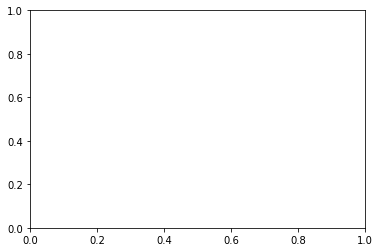

In [23]:
plt.hist(train_df['Age'])#绘制直方图
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值
#不处理空值会报错

Text(0,0.5,'Count')

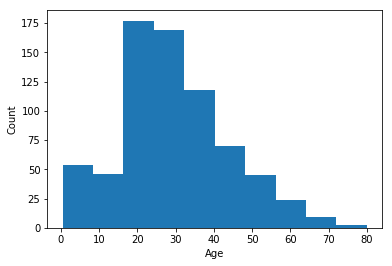

In [26]:
plt.hist(train_df['Age'].dropna())#绘制直方图,    「 .dropna() 」去空值
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值

Text(0,0.5,'Count')

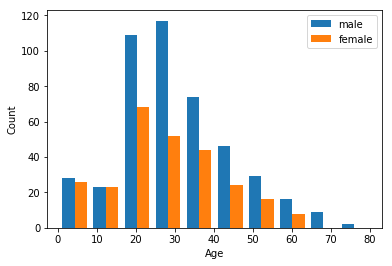

In [27]:
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
#类比r语言，train_df[train_df['Sex'] == 'male'].Age-->指的是训练集中sex为男的情况下的人的年龄
plt.legend(['male','female']) #标上图例
plt.xlabel('Age')
plt.ylabel('Count')

In [28]:
pd.crosstab(train_df['Survived'],train_df['Sex'])
#交叉表crosstab生成，使用pandas包（存活人数和性别）

Sex,female,male
Survived,,
0,81,468
1,233,109


In [29]:
pd.crosstab(train_df['Survived'],train_df['Pclass'])
#存活人数和仓级的关系

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
train_df.groupby(['Embarked','Survived']).size()
#类比sql的groupby，size()-->count(*)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [ ]:
在python中使用sql语言

In [43]:
 pip install -U pandasql


The following command must be run outside of the IPython shell:

    $ pip install -U pandasql

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [48]:
from pandasql import sqldf
#对python中对pandas进行sql查询

In [51]:
ql ="""
select Survived,Parch,count(*)
from train_df
group by Survived,Parch
"""
sqldf(ql)


,Survived,Parch,count(*)
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40
